In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat
from scipy.spatial import distance
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


In [2]:
n_subjects = 48
n_controls = 17
n_controls_1 = 16
n_patients = 31
n_windows = 159
n_corr = 78

In [5]:
if sys.platform == 'darwin': # OS X
    subject_names = glob.glob('/Users/anna/Documents/LV_Stroke_new/Data/DFNC_LV_no15_0307/WithSM_dfnc_sub*',)
else: # all other operating systems
    print('Please enter the windows system path at this line. Thanks!!!')
subject_names = sorted(subject_names)

In [6]:
def calc_num_components(a):
    num_pairs = len(a)
    num_components = int(np.ceil(np.sqrt(2 * num_pairs - 1)))
    if num_components * (num_components - 1) == 2 * num_pairs:
        return num_components
    else:
        return 0


def return_dfnc_from_vector(a):
    '''This Function returns a dfnc matrix given a vector
        a : the vector of correlation pairs
    '''
    n = calc_num_components(a)
    out = np.zeros((n, n))

    if not n:
        return out
    
    l_indices = np.tril_indices(n, -1)
    u_indices = np.triu_indices(n, 1)

    out[u_indices] = a
    out[l_indices] = out.T[l_indices]
    
    return out

In [7]:
# loading individual dncs
dfnc = np.zeros((n_subjects,n_windows,n_corr))
for n in range(0,n_subjects,1):
    
    dfnc[n] = loadmat(subject_names[n][-40:])['FNCdyn']

In [24]:
# Raveling dfnc matrices, so to have a 1D-vector of dynamic connectivities per sliding window (i.e. 7632 windows (159 windows per 48 subjects) and 78 connectivity pairs)
a = np.ravel(dfnc)
a = np.reshape(a,(7632,78))

In [25]:
# Silhouette measure for k=2
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(a)
labels = kmeans_model.labels_
two = metrics.silhouette_score(a, labels, metric='euclidean')
two

0.12059078674087682

In [26]:
# Silhouette measure for k=3, the lowest value
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(a)
labels = kmeans_model.labels_
three = metrics.silhouette_score(a, labels, metric='euclidean')
three

0.13384235681338216

In [28]:
# Silhouette measure for k=4
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(a)
labels = kmeans_model.labels_
four = metrics.silhouette_score(a, labels, metric='euclidean')
four

0.11822585729143308

In [29]:
# Silhouette measure for k=5
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(a)
labels = kmeans_model.labels_
five = metrics.silhouette_score(a, labels, metric='euclidean')
five

0.13069463804137252

In [31]:
# Silhouette measure for k=6
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(a)
labels = kmeans_model.labels_
six = metrics.silhouette_score(a, labels, metric='euclidean')
six

0.12327843553477007

In [32]:
kmeans_model = KMeans(n_clusters=7, random_state=1).fit(a)
labels = kmeans_model.labels_
seven = metrics.silhouette_score(a, labels, metric='euclidean')
seven

0.1158404288242489

In [33]:
# Silhouette measure for k=8
kmeans_model = KMeans(n_clusters=8, random_state=1).fit(a)
labels = kmeans_model.labels_
eight = metrics.silhouette_score(a, labels, metric='euclidean')
eight

0.1004664859607591

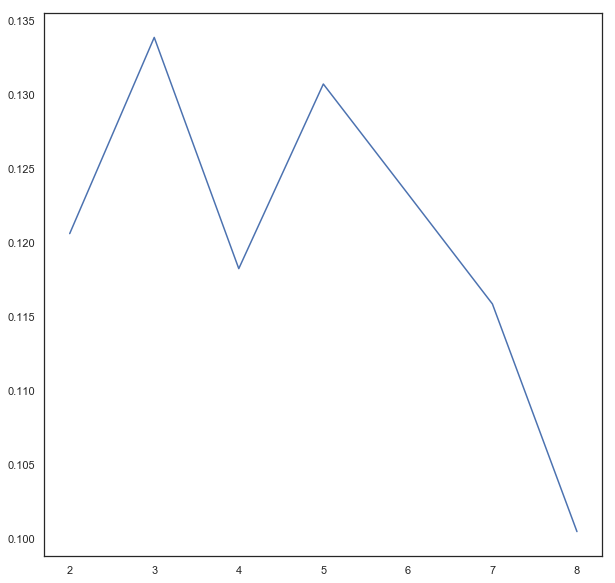

In [39]:
plt.figure(figsize=(10, 10))
plt.plot([2,3,4,5,6,7,8],[two, three, four, five, six, seven, eight])
plt.show()